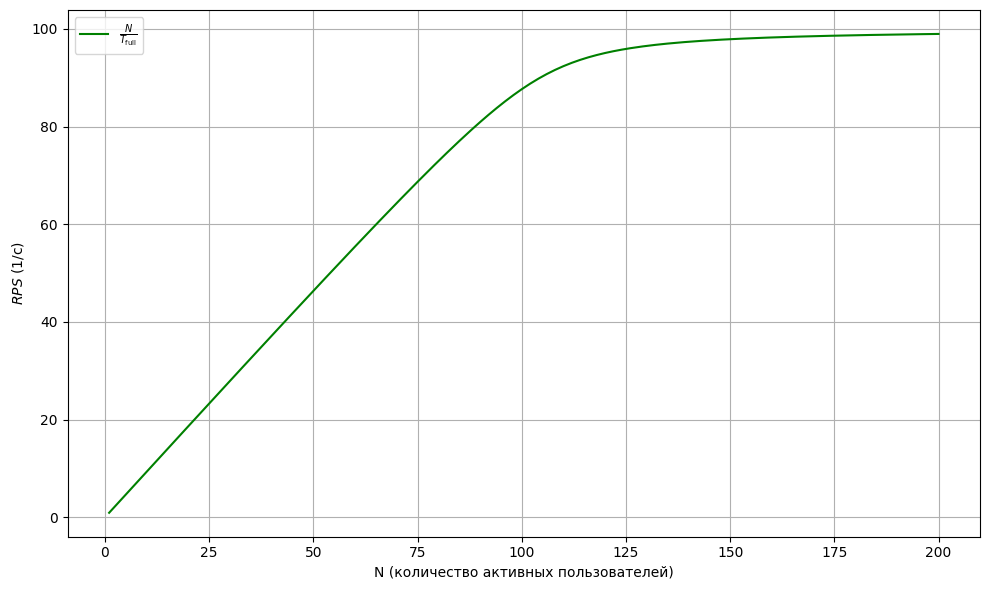

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Заданные параметры
T_ping = 60       # мс
T_wait = 1000     # мс
T_handle = 10     # мс

def T_full_equation(T_full, N):
    alpha = (T_handle * N) / T_full
    if alpha >= 1:
        return 1e6  # избегаем деления на 0
    return T_full - (T_ping + T_wait + T_handle / (1 - alpha))

# Диапазон N
N_values = np.arange(1, 201)
T_full_values = []

# Начальное значение (заведомо допустимое)
last_T = T_ping + T_wait

for N in N_values:
    T_guess = last_T + T_handle * N
    T_full = fsolve(T_full_equation, T_guess, args=(N))[0]
    alpha = (T_handle * N) / T_full

    # Проверка корректности решения
    if 0 < alpha < 1 and T_full > last_T:
        T_full_values.append(T_full)
        last_T = T_full
    else:
        T_full_values.append(np.nan)

# Построение графика
# plt.figure(figsize=(10, 6))
# plt.plot(N_values, T_full_values, label=r'$T_{\text{полн}}$', color='blue')
# plt.xlabel('N (количество активных пользователей)')
# plt.ylabel(r'$T_{\text{полн}}$ (мс)')
# plt.title(r'Зависимость $T_{\mathrm{full}}$ от $N$')
# plt.ylim(bottom=0)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# Вычисляем отношение N / T_full, переводим в 1/с
N_over_T = (np.array(N_values) / np.array(T_full_values)) * 1000  # теперь в 1/с

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(N_values, N_over_T, label=r'$\frac{N}{T_{\mathrm{full}}}$', color='green')
plt.xlabel('N (количество активных пользователей)')
plt.ylabel(r'$RPS$ (1/с)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


